<a href="https://colab.research.google.com/github/Hidenaga41/timeseries/blob/master/Timeseries1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4 加法モデルと乗法モデル

何位も加工していない時系列データは傾向変動 Trend variation 季節変動 Seadonal Variation 不規則変動Irregular variation の3つの変動成分に分解できる．

時系列データを3つの基本成分の合成であると考えるときに， 合成の仕方として
加法モデル Assitive model
乗法モデル Multiplicative model

原系列データをO(t) とすると，傾向変動，季節変動，不規則変動を
O(t) = T(t)+S(t)+I(t)
O(t) = T(t)*S(t)*I(t)
と洗わせる．

不規則変動は，傾向変動と季節変動では表現できなかった残差に相当するものであるため，傾向変動及び，季節変動のみで原系列を復元することを考える．

# 1.5 移動平均（時系列変動の平滑化）

ノイズの除去には時系列変動のスムージングSmoothingを行い誤算変動をキャンセルアウトする事が有効である．

## 1.5.1 平滑化
移動平均法 Moving average method
移動中心値法 Running median method
がある．




In [ ]:
# １．５．２ 移動平均の例

https://www.mizuhobank.co.jp/market/csv/quote.csv

In [ ]:
import re
import os
import glob
from shapely.geometry import Point
from geopy import distance
import json
import pandas as pd
import requests
import folium
import matplotlib.pyplot as plt
import numpy as np
import folium.plugins as plugins
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests
import io
import pandas as pd

response = requests.get('https://www.mizuhobank.co.jp/market/csv/m_quote.csv')

file_object = io.StringIO(response.content.decode('shift-JIS'))
df = pd.read_csv(file_object, header=1)
df.head()

,Unnamed: 0,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,NZD,ZAR,BHD,IDR(100),CNY,HKD,INR,MYR,PHP,SGD,KRW(100),THB,KWD,SAR,AED,MXN,PGK,HUF,CZK,PLN,RUB,TRY,IDR(100).1,CNY.1,MYR.1,KRW(100).1,TWD
0,2002/4/30,131.15,189.01,115.97,82.83,79.13,12.73,15.61,15.20,70.24,58.08,11.83,348.32,*****,*****,16.82,2.69,*****,2.58,71.64,9.99,3.02,429.50,34.98,35.71,14.36,*****,*****,*****,*****,NaN,NaN,1.39,15.84,*****,9.99,3.77
1,2002/5/31,126.44,184.56,115.88,81.58,79.60,12.57,15.59,15.43,69.58,58.38,12.51,335.97,*****,*****,16.21,2.60,*****,2.54,70.23,10.1,2.96,417.48,33.73,34.43,13.30,*****,*****,*****,*****,NaN,NaN,1.41,15.28,*****,10.10,3.68
2,2002/6/28,123.53,183.00,117.83,80.64,80.09,12.94,15.86,15.92,70.29,60.48,12.22,328.37,*****,*****,15.84,2.54,*****,2.46,69.27,10.2,2.93,410.12,32.96,33.64,12.67,*****,*****,*****,*****,NaN,NaN,1.44,14.93,*****,10.20,3.66
3,2002/7/31,118.05,183.64,117.23,76.52,80.16,12.67,15.79,15.83,65.42,56.82,11.73,313.77,*****,*****,15.13,2.43,*****,2.34,67.35,9.98,2.86,393.79,31.49,32.15,12.07,*****,*****,*****,*****,NaN,NaN,1.34,14.26,*****,9.98,3.56
4,2002/8/30,119.08,183.14,116.45,75.85,79.60,12.59,15.69,15.68,64.47,55.28,11.31,316.39,*****,*****,15.27,2.46,*****,2.31,67.82,9.97,2.83,396.92,31.77,32.43,12.12,*****,*****,*****,*****,NaN,NaN,1.35,14.39,*****,9.97,3.53


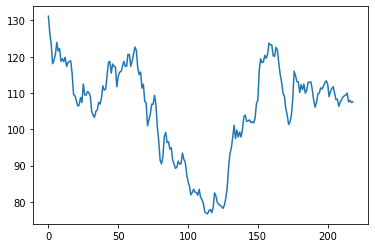

In [ ]:
df.USD.plot()

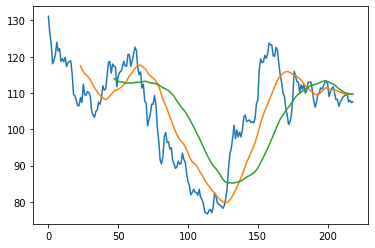

In [ ]:
df.USD.plot()
df.USD.rolling(24).mean().plot()
df.USD.rolling(48).mean().plot()

In [ ]:
# 中心化移動平均

response = requests.get('https://oku.edu.mie-u.ac.jp/~okumura/stat/data/icecream.csv')

file_object = io.StringIO(response.content.decode('shift-JIS'))
df_ice = pd.read_csv(file_object, header=1)
df_ice.head()

,年,月,アイスクリーム
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632


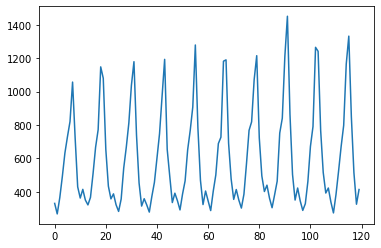

In [ ]:
df_ice['アイスクリーム'].plot()

In [ ]:
df_ma = df_ice['アイスクリーム'].rolling(12).mean().shift(-6)
df_cma = df_ma.rolling(window=2).mean()
df_cma

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
115   NaN
116   NaN
117   NaN
118   NaN
119   NaN
Name: アイスクリーム, Length: 120, dtype: float64

In [ ]:
df_ma

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
115   NaN
116   NaN
117   NaN
118   NaN
119   NaN
Name: アイスクリーム, Length: 120, dtype: float64

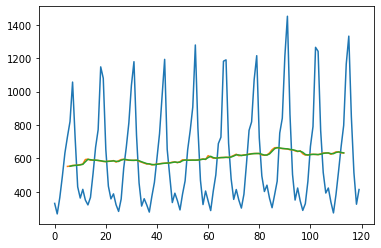

In [ ]:
df_ice['アイスクリーム'].plot()
df_ma.plot()
df_cma.plot()

## 1.7 季節調整 Seasonal Adjustment

季節調整法の一つであるセンサス局法 Census Burean method

1. 中心化移動平均を求める：T系列の作成
2. 原系列を中心課移動平均で除した値を求め100倍する．：S*I 系列の作成
3. 手順２ で求めた値から１２ヶ月ごとの季節指数を求める．当該指数を求めるには， 月ごとの平均値を求めた上でその和が１２００になるように調整する．：S系列の作成
4. 原系列を季節指数で割って100をかけ，季節調整済みの値をする．：T*I系列の作成






In [ ]:
df_ice['アイスクリーム']

0       331
1       268
2       365
3       492
4       632
       ... 
115    1332
116     849
117     515
118     326
119     414
Name: アイスクリーム, Length: 120, dtype: int64

In [ ]:
df_cma

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
115   NaN
116   NaN
117   NaN
118   NaN
119   NaN
Name: アイスクリーム, Length: 120, dtype: float64

In [ ]:
# 原系列/ 中心化移動平均系列
df_orig_div_cma = df_ice['アイスクリーム'] / df_cma
df_orig_div_cma.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: アイスクリーム, dtype: float64

In [ ]:
# 月ごとに加算
orig_div_cma = df_orig_div_cma.values
print(orig_div_cma)
print(len(orig_div_cma))

[       nan        nan        nan        nan        nan        nan
 1.48418198 1.90022472 1.29613606 0.76877235 0.64653061 0.73494687
 0.60512894 0.54151776 0.61927863 0.86126024 1.13090781 1.31190257
 1.95848735 1.85129634 1.12327982 0.7452243  0.6131887  0.66268147
 0.55446678 0.48621949 0.60534125 0.91394908 1.12455216 1.37597967
 1.76098493 2.00283126 1.254314   0.77270789 0.54314247 0.62480058
 0.56565657 0.4919189  0.66110332 0.81268524 1.0657225  1.31893322
 1.70839125 2.08885971 1.14285714 0.86007124 0.58367111 0.67751692
 0.60169063 0.50555475 0.65975281 0.78849408 1.10602205 1.30270691
 1.53887437 2.16840916 1.32796951 0.79150552 0.54404254 0.68024354
 0.57182206 0.46998028 0.66753873 0.83268698 1.14206782 1.20173566
 1.95197138 1.96248196 1.13979381 0.78410959 0.57774463 0.66604102
 0.56536913 0.49085386 0.62291555 0.91515883 1.22986588 1.30517928
 1.70417964 1.92984778 1.14845456 0.7919472  0.6483871  0.70939137
 0.57739084 0.47464661 0.58180898 0.69822559 1.13459483 1.2743

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
s_index = np.zeros(12)
counter = np.zeros(12, dtype='i')
print('initial counter: ', counter)
for idx in range(len(orig_div_cma)//12):
  print('idx: ',idx)
  # 12ヶ月ごとにデータを抽出
  cut_orig_div_cma = orig_div_cma[idx*12:(idx+1)*12]
  print('cut_orig_div_cma: ', cut_orig_div_cma)
  mask = cut_orig_div_cma != cut_orig_div_cma
  print("mask: ", mask)
  # numpy.where を使用してNaNを０にして加算する
  counter += np.where(mask, 0,1) # NaNじゃなければ１を足す
  print('counter: ', counter)
  s_index += np.where(mask, 0, cut_orig_div_cma) #NaNじゃなければ，その月の値を足す
  print('s_index: ', s_index)

initial counter:  [0 0 0 0 0 0 0 0 0 0 0 0]
idx:  0
cut_orig_div_cma:  [       nan        nan        nan        nan        nan        nan
 1.48418198 1.90022472 1.29613606 0.76877235 0.64653061 0.73494687]
mask:  [ True  True  True  True  True  True False False False False False False]
counter:  [0 0 0 0 0 0 1 1 1 1 1 1]
s_index:  [0.         0.         0.         0.         0.         0.
 1.48418198 1.90022472 1.29613606 0.76877235 0.64653061 0.73494687]
idx:  1
cut_orig_div_cma:  [0.60512894 0.54151776 0.61927863 0.86126024 1.13090781 1.31190257
 1.95848735 1.85129634 1.12327982 0.7452243  0.6131887  0.66268147]
mask:  [False False False False False False False False False False False False]
counter:  [1 1 1 1 1 1 2 2 2 2 2 2]
s_index:  [0.60512894 0.54151776 0.61927863 0.86126024 1.13090781 1.31190257
 3.44266933 3.75152106 2.41941587 1.51399665 1.25971931 1.39762834]
idx:  2
cut_orig_div_cma:  [0.55446678 0.48621949 0.60534125 0.91394908 1.12455216 1.37597967
 1.76098493 2.00283126

In [ ]:
#加算結果の各月平均
s_index /= counter 

In [ ]:
#全体を１２００に合わせ季節指数を計算
s_index = s_index / s_index.sum() * 1200

In [ ]:
s_index



array([ 57.05374632,  48.4935788 ,  61.87100094,  82.34066594,
       112.21945388, 129.50185932, 178.03993789, 201.78512364,
       122.39560152,  79.21403276,  59.2923283 ,  67.79267067])

In [ ]:
# 季節指数を原系列の要素と対応させる
# 原系列のスタートが１月なので， numpy.tile で１２ヶ月分の季節指数を繰り返す(np.tile)だけでよい
tiled_s_index = np.tile(s_index, len(orig_div_cma )// 12)
print('tiled_s_index: ', tiled_s_index)

tiled_s_index:  [ 57.05374632  48.4935788   61.87100094  82.34066594 112.21945388
 129.50185932 178.03993789 201.78512364 122.39560152  79.21403276
  59.2923283   67.79267067  57.05374632  48.4935788   61.87100094
  82.34066594 112.21945388 129.50185932 178.03993789 201.78512364
 122.39560152  79.21403276  59.2923283   67.79267067  57.05374632
  48.4935788   61.87100094  82.34066594 112.21945388 129.50185932
 178.03993789 201.78512364 122.39560152  79.21403276  59.2923283
  67.79267067  57.05374632  48.4935788   61.87100094  82.34066594
 112.21945388 129.50185932 178.03993789 201.78512364 122.39560152
  79.21403276  59.2923283   67.79267067  57.05374632  48.4935788
  61.87100094  82.34066594 112.21945388 129.50185932 178.03993789
 201.78512364 122.39560152  79.21403276  59.2923283   67.79267067
  57.05374632  48.4935788   61.87100094  82.34066594 112.21945388
 129.50185932 178.03993789 201.78512364 122.39560152  79.21403276
  59.2923283   67.79267067  57.05374632  48.4935788   61.87100

0      580.154716
1      552.650488
2      589.937118
3      597.517635
4      563.182210
          ...    
115    660.108127
116    693.652378
117    650.137333
118    549.818179
119    610.685485
Name: アイスクリーム, Length: 120, dtype: float64

In [ ]:
# 季節調整済み系列の計算
df_adjusted_series = df_ice['アイスクリーム'] / tiled_s_index *100
df_adjusted_series


0      580.154716
1      552.650488
2      589.937118
3      597.517635
4      563.182210
          ...    
115    660.108127
116    693.652378
117    650.137333
118    549.818179
119    610.685485
Name: アイスクリーム, Length: 120, dtype: float64

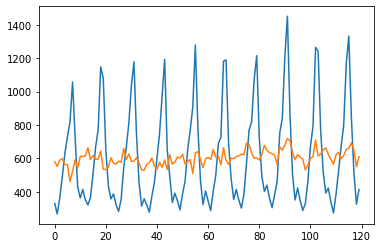

In [ ]:
df_ice['アイスクリーム'].plot()
df_adjusted_series.plot()

In [ ]:
# 1.7.3 季節指数Seasonal Index の意味
# 100を一年の平均値と考えた時の各月の季節効果を含んだ相対的な値
s_index

array([ 57.05374632,  48.4935788 ,  61.87100094,  82.34066594,
       112.21945388, 129.50185932, 178.03993789, 201.78512364,
       122.39560152,  79.21403276,  59.2923283 ,  67.79267067])

In [ ]:
month_object = 10000000/1200*s_index
month_object

array([ 475447.88603034,  404113.15670627,  515591.67453831,
        686172.21618252,  935162.11570716, 1079182.16103648,
       1483666.14912336, 1681542.69696515, 1019963.34598289,
        660116.93966424,  494102.735818  ,  564938.9222453 ])

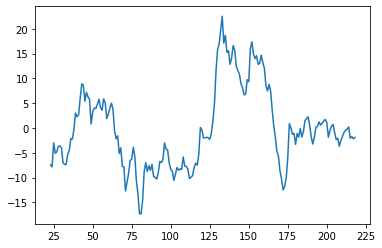

In [ ]:
# 1.8 移動平均乖離率 Moving average deviation rate
# 移動平均系列と原系列データとがどの程度離れているかを示す指標
# 原系列データの上昇下降の変換点に関して知見が得られる事がある．株式など
ma24 = df.USD.rolling(24).mean()
diff_ma24 = (df.USD - ma24) / ma24 * 100
diff_ma24.plot()

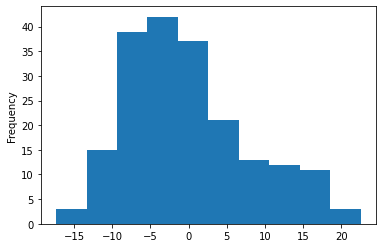

In [ ]:
# １０%以上の乖離率がまれである
diff_ma24.plot.hist()

# １．９ 時系列データの基本統計量と前処理

## １．９．１ 基本統計量
最も基本的な期待値Expected value もしくは平均meanである．
ytの期待値はE[yt] である．
ytが期待値から平均的にどの程度ばらつくかの度合いを表す統計量の一つが分散である．
ytの分散Varianceは，より性格には期待値を用いてE[(yt-μt)^2]で定義されVar［yt］と表記する
また，分散の平方根は標準偏差Standard Deviatio と呼ぶ．金融ではボラティリティVolatilityと呼ぶ事が多く， リスク計測する指標として用いられる．

自己共分散Autocovarianceは時系列解析に特有の統計量である．
２つの確立変数が同一の時系列データの要素である事を除くと， 通常の共分散Covarianceと何ら変わらない．
例えば，一次の自己共分散が正であれば，一時点離れたデータは期待値を基準として同じ方向に動く傾向がある．

また， 自己共分散をkの関数として見たものは自己共分散関数と呼ばれる．分散共分散行列 Variance-Covariance matrixの性質より， 自己共分散関数は（半）正定値Positive（Semi)definiteになることが知られている．

自己共分散の一つの問題点は値が単位に依存してしまう事である．したがって，自己共分散の値によって変数間の関係の強弱を測ることはできない．そこkで，値が単位に依存しないように自己共分散を基準課したものが，自己相関係数Autocorrelation coefficientである．

自己相関係数をkの関数として見ると，自己相関関数とよばれ，自己相関関数をグラフに書くとCorrelogramと呼ばれる．

将来の予測をする際に， 時系列解析では確率過程Stochastic processを導入する．
時系列データはあるか売りつ変数列からの一つの実現値であるとみなす．
時系列解析では，確立課程の構造を時系列モデルと呼ぶ

##  １．９．２ データ変換

- 対数系列
- 差分系列
- 対数差分系列

## １．９．３ 欠損データ

欠損値補完の方法として，以下の方法が使われている．
- 一時点前の値による補完
- 線形補完
- 両側N個のデータの平均値に夜補完
- 両側Nこのデータのメジアンによる補完
- スプライン関数に夜補完



## １．９．４ 統計的仮説検定　Satatisical Hypothesis testing

同時に起こることのない（互いに背反）な２つの仮説（帰無仮説Null Hypothesisiと対立仮説Alternative hypothesis)を立て，データに基づいてどちらかの仮設おｗ受容するかを判断する方法である．
- 第一種過誤 Type1 error，α Error ： 帰無仮説が正しいにも関わらず，帰無仮説を棄却する誤り，
- 第二種過誤， Type2 Error, β Error : 帰無仮説が正しくないにも関わらず，帰無仮説を受容する誤り，

この第一種過誤の確立に対する水準を優位水準Signnificance level と呼ぶ．
統計ソフトでは， 帰無仮説の需要棄却の判断をしない代わりに， 第一種過誤の確立である， ｐ値 を出力する． ある優位水準で統計的仮説検定を行うには， p値と有意水準の大小を比較する． ｐ値が有意水準より小さければ， 帰無仮説を棄却し， 対立仮説を受容する．
ここでは， Shapiro-wilk testを用いてデータが正規分布に従っているかを検定する．
帰無仮説：対象データが正規分布にしたがう

階差を取らない場合は，トレンドを含んでいるため正規分布にならず， 一次階差をとると正規分布に近くなる．
有意水準は５%

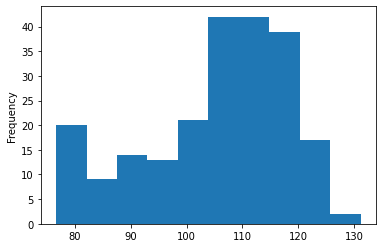

In [ ]:
 # 原系列のヒストグラム表示
 df.USD.plot.hist()

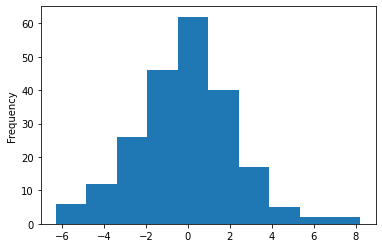

In [ ]:
#一次階差 階差を取ると欠損値が生じるため， dropna()で削除
df_diff1 = df.USD.diff().dropna()
df_diff1.plot.hist()

In [ ]:
import scipy.stats as stats

# 原系列のShapiro-wilk test (W統計量，p値)
test1 = stats.shapiro(df.USD.values)
print(test1)
print(test1[1] > 0.05)

(0.926832377910614, 5.727069929406525e-09)
False


In [ ]:
test2 = stats.shapiro(df_diff1.values)
print(test2)
print(test2[1] > 0.05)

(0.9883000254631042, 0.07201644778251648)
True


In [ ]:
# 1.9.5 時間依存性の発見

import io
import requests
import statsmodels.api as sm

url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))
passengers = content['#Passengers']
passengers.head()

0    112
1    118
2    132
3    129
4    121
Name: #Passengers, dtype: int64

In [94]:
import statsmodels.api as sm

#自己相関係数を計算する
p_acf = sm.tsa.stattools.acf(passengers)
print(p_acf)

[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376 0.48248203 0.51712699
 0.53218983 0.49397569 0.43772134 0.3876029  0.34802503 0.31498388
 0.28849682 0.27080187 0.26429011 0.27679934 0.2985215  0.32558712
 0.3370236  0.30333486 0.25397708 0.21065534 0.17217092]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


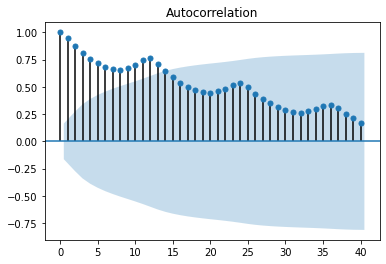

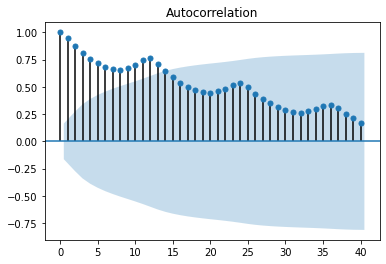

In [95]:
sm.graphics.tsa.plot_acf(passengers, lags=40)

# ラグが大きくなるほど自己相関係数の値が小さくなる．
# 14ヶ月前までは5%を超えているため，有意に相関関係が認められる
# しかし， 自己相関係数の計算ｎではラグ1の積み重ねによる間接的な関係がふくまれているからある．推移関係Transitive relation

In [97]:
#推移関係を排除した自己相関係数を偏自己相関係数と呼ぶ．PARCOR．PACF，Partial autocorrelation
p_pacf  = sm.tsa.stattools.pacf(passengers, method='ols')
print(p_pacf)

[ 1.          0.95893198 -0.32983096  0.2018249   0.14500798  0.25848232
 -0.02690283  0.20433019  0.15607896  0.56860841  0.29256358  0.8402143
  0.61268285 -0.66597616 -0.38463943  0.0787466  -0.02663483 -0.05805221
 -0.04350748  0.27732556 -0.04046447  0.13739883  0.3859958   0.24203808
 -0.04912986 -0.19599778 -0.15443575  0.04484465  0.18371541 -0.0906113
 -0.06202938  0.34827092  0.09899499 -0.08396793  0.36328898 -0.17956662
  0.15839435  0.06376775 -0.27503705  0.2707607   0.32002003]


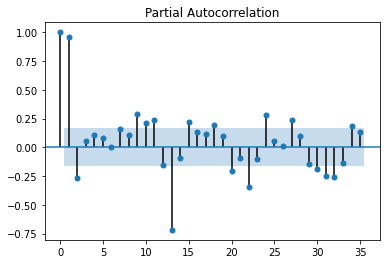

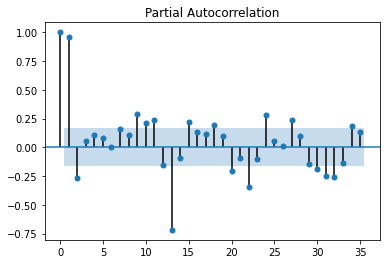

In [98]:
sm.graphics.tsa.plot_pacf(passengers, lags=35)

In [101]:
# 1.9.6 定常性
# 強定常性， 弱定常性， 非定常性，

df_logdiff_USD = (1 + df.USD.pct_change()).apply(np.log)
print(df_logdiff_USD)

0           NaN
1     -0.036574
2     -0.023284
3     -0.045376
4      0.008687
         ...   
214    0.005470
215   -0.022527
216    0.003898
217   -0.005666
218    0.001861
Name: USD, Length: 219, dtype: float64


In [103]:
df.USD.div(df.USD.shift(1)) - 1

0           NaN
1     -0.035913
2     -0.023015
3     -0.044362
4      0.008725
         ...   
214    0.005485
215   -0.022275
216    0.003906
217   -0.005650
218    0.001863
Name: USD, Length: 219, dtype: float64

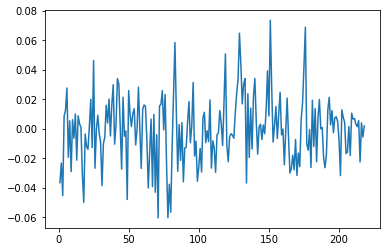

In [107]:
df_logdiff_USD.plot()

## 1.9.7 ホワイトノイズ
弱定常課程


多くのモデルの確率的な変動はホワイトノイズで記述される．